In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

#### CMPS 3160-01 Fa23

#### Collette Riviere and Toby Mendels

#### Link to our GitHub Webpage: https://criviere1.github.io/


# Project Goals
The team, **Collette Riviere and Toby Mendels**, will be investigating datasets related to Covid-19 infection rates, vaccine hesitancy rates, actual Covid-19 vaccine rates, and state by state demographic information. Most of the data will come from the US Census Bureau, specifically the Household Pulse Survey (HPS) and the American Community Survey (ACS). Daily Covid-19 infeciton rates were collected by the Center for Systems Science and Engineering at Johns Hopkins University from the World Health Organization (WHO) and the US Centers for Disease Control and Prevention (CDC). Finally, actual Covid-19 vaccine trends were colllected from the CDC. 

From the HPS survey, we are interested in vaccine hesitancy by state. The Covid-19 vaccine was a devicive issue for many people so looking at vaccine hesitency before the Covid-19 pandemic could help indicate which parts of the US could be most reluctant or hesitant about the Covid-19 vaccines. This relates to the second dataset, daily Covid-19 infection reports across states. This dataset can help investigate how Covid-19 spread across the USA from Janurary 2020 to March 2023 and how different states were affected by the pandemic over time. The third dataset is state-by-state demographic information, such as sex, age, race, income, health insurance status, and educational attainment. This dataset could potentially indicate a relationship between state demographic information vaccine hesitancy or Covid-19 cases. The last dataset on actual vaccine trends can help highlight the difference between hesitancy and actual vaccine rates. It can also be compared to case rates to determine if the vaccine actually helped slow the spread of the pandemic.


All of these datasets in conjunction can help these specific answer questions:
- "Did states with more vaccine hesitancy have higher rates of Covid-19 infection, especially after the Covid-19 vaccine was released?" 
- "Did vaccines decrease the Covid-19 infection rate (assuming people with little vaccine hesitancy got the Covid-19 vaccine)?"
- "How do states with different demographic makeups differ in vaccine hesitancy and Covid-19 cases?"


Inital steps to answer these questions would be analyze the correlation between each dataset. Additionally, comparing the rates of Covid-19 cases before and after the vaccine was rolled out would help to start addressing the question of whether the vaccine redcued Covid-19 rates. This is discussed more below.


The data we are using from the Household Pulse Survey is found here: https://data.cdc.gov/Vaccinations/Vaccine-Hesitancy-for-COVID-19-County-and-local-es/q9mh-h2tw/data.


Selected Demographic information from the ACS is found here: 
- https://data.census.gov/cedsci/table?q=DP02#
- https://data.census.gov/cedsci/table?q=DP03#
- https://data.census.gov/cedsci/table?q=DP05# 


COVID-19 infection reports can be found here: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/README.md.


Covid-19 Vaccination Trends can be found from the CDC here: https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Trends-in-the-United-States-N/rh2h-3yt2



### Collaboration Plan
The team plans to meet every other week to work on this project to finalize the project, discuss next steps, and help each other. We will also be communicating over text messages to update each other with our progress. We have also set up a shared Github repository to house and update our code and datasets.

In [37]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

# Table 1: Demographic Information by State

First, we have to read in the tables from the ACS and select the data that we want.

In [38]:
demo1_df = pd.read_csv("/Users/colletteriviere/criviere1.github.io/datasets/ACSDP1Y2022.DP02-2023-edu.csv")
demo2_df = pd.read_csv("/Users/colletteriviere/criviere1.github.io/datasets/ACSDP1Y2022.DP03-2023-employment,income,healthinsurance.csv")
demo3_df = pd.read_csv("/Users/colletteriviere/criviere1.github.io/datasets/ACSDP1Y2022.DP05-2023-sex,age,race.csv")

In [39]:
edu_df = demo1_df.iloc[67:74,:-2]

inc_df = demo2_df.iloc[list(range(67,69)),:-2]
ins_df = demo2_df.iloc[[102,105],:-2]

age_df = demo3_df.iloc[[18],:-2]
sex_df = demo3_df.iloc[[2,3],:-2]
race_df = demo3_df.iloc[[76]+list(range(82,89)),:-2]

In [40]:
df_all = pd.concat([edu_df,inc_df,ins_df,age_df,sex_df,race_df])
df_all.set_index([df_all.columns[0]], inplace=True)
df_all.head()

,Alabama!!Estimate,Alabama!!Percent,Alaska!!Estimate,Alaska!!Percent,Arizona!!Estimate,Arizona!!Percent,Arkansas!!Estimate,Arkansas!!Percent,California!!Estimate,California!!Percent,...,Virginia!!Estimate,Virginia!!Percent,Washington!!Estimate,Washington!!Percent,West Virginia!!Estimate,West Virginia!!Percent,Wisconsin!!Estimate,Wisconsin!!Percent,Wyoming!!Estimate,Wyoming!!Percent
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Less than 9th grade,"118,034",3.4%,"10,950",2.2%,"241,467",4.8%,"82,740",4.0%,"2,376,805",8.8%,...,"209,876",3.5%,"192,061",3.5%,"43,318",3.4%,"99,448",2.4%,"8,563",2.1%
"9th to 12th grade, no diploma","271,263",7.8%,"21,719",4.4%,"306,781",6.1%,"140,697",6.8%,"1,738,878",6.5%,...,"295,899",4.9%,"236,434",4.3%,"93,833",7.4%,"167,049",4.1%,"16,511",4.1%
High school graduate (includes equivalency),"1,057,155",30.4%,"142,455",29.1%,"1,202,946",23.8%,"705,670",34.3%,"5,506,855",20.5%,...,"1,431,624",23.9%,"1,176,424",21.5%,"484,166",38.3%,"1,209,135",29.6%,"109,092",27.3%
"Some college, no degree","716,144",20.6%,"116,078",23.7%,"1,160,936",23.0%,"438,076",21.3%,"5,192,854",19.3%,...,"1,067,612",17.9%,"1,161,011",21.2%,"216,917",17.2%,"798,565",19.5%,"99,620",24.9%
Associate's degree,"311,537",9.0%,"48,370",9.9%,"475,387",9.4%,"167,634",8.1%,"2,115,440",7.9%,...,"451,737",7.6%,"544,596",10.0%,"111,246",8.8%,"455,882",11.2%,"47,844",12.0%


Now to organize the data and get it ready for analysis, the dtypes are corrected and the table is tidied.

In [41]:
df_all.T.dtypes

Label (Grouping)
        Less than 9th grade                                     object
        9th to 12th grade, no diploma                           object
        High school graduate (includes equivalency)             object
        Some college, no degree                                 object
        Associate's degree                                      object
        Bachelor's degree                                       object
        Graduate or professional degree                         object
        Median household income (dollars)                       object
        Mean household income (dollars)                         object
        With health insurance coverage                          object
        No health insurance coverage                            object
        Median age (years)                                      object
        Male                                                    object
        Female                                              

In [42]:
df_all.replace(',','', regex=True, inplace=True)
df_all.replace('%','', regex=True, inplace=True)
df_all.replace('(X)', None, regex=True, inplace=True)

cols = df_all.columns.to_series()
cols.replace('!!Estimate','', regex=True, inplace=True)
cols.replace('!!Percent','%', regex=True, inplace=True)
cols.replace(us_state_to_abbrev,inplace=True)
df_all.columns = cols

df_all = df_all.apply(pd.to_numeric, errors='ignore')

df_all

,AL,Alabama%,AK,Alaska%,AZ,Arizona%,AR,Arkansas%,CA,California%,...,VA,Virginia%,WA,Washington%,WV,West Virginia%,WI,Wisconsin%,WY,Wyoming%
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Less than 9th grade,118034.0,3.4,10950.0,2.2,241467.0,4.8,82740.0,4.0,2376805.0,8.8,...,209876.0,3.5,192061.0,3.5,43318.0,3.4,99448.0,2.4,8563.0,2.1
"9th to 12th grade, no diploma",271263.0,7.8,21719.0,4.4,306781.0,6.1,140697.0,6.8,1738878.0,6.5,...,295899.0,4.9,236434.0,4.3,93833.0,7.4,167049.0,4.1,16511.0,4.1
High school graduate (includes equivalency),1057155.0,30.4,142455.0,29.1,1202946.0,23.8,705670.0,34.3,5506855.0,20.5,...,1431624.0,23.9,1176424.0,21.5,484166.0,38.3,1209135.0,29.6,109092.0,27.3
"Some college, no degree",716144.0,20.6,116078.0,23.7,1160936.0,23.0,438076.0,21.3,5192854.0,19.3,...,1067612.0,17.9,1161011.0,21.2,216917.0,17.2,798565.0,19.5,99620.0,24.9
Associate's degree,311537.0,9.0,48370.0,9.9,475387.0,9.4,167634.0,8.1,2115440.0,7.9,...,451737.0,7.6,544596.0,10.0,111246.0,8.8,455882.0,11.2,47844.0,12.0
Bachelor's degree,609316.0,17.5,94168.0,19.2,1032052.0,20.4,323961.0,15.7,6056169.0,22.5,...,1409942.0,23.6,1302707.0,23.8,188793.0,15.0,885548.0,21.7,71812.0,18.0
Graduate or professional degree,391475.0,11.3,55478.0,11.3,634087.0,12.5,198846.0,9.7,3879772.0,14.4,...,1112092.0,18.6,856976.0,15.7,124293.0,9.8,472873.0,11.6,46354.0,11.6
Median household income (dollars),59674.0,NaN,88121.0,NaN,74568.0,NaN,55432.0,NaN,91551.0,NaN,...,85873.0,NaN,91306.0,NaN,54329.0,NaN,70996.0,NaN,70042.0,NaN
Mean household income (dollars),82956.0,NaN,109524.0,NaN,101316.0,NaN,76853.0,NaN,131504.0,NaN,...,119058.0,NaN,125847.0,NaN,75265.0,NaN,94085.0,NaN,90018.0,NaN


In [43]:
df_all.T.dtypes

Label (Grouping)
        Less than 9th grade                                     float64
        9th to 12th grade, no diploma                           float64
        High school graduate (includes equivalency)             float64
        Some college, no degree                                 float64
        Associate's degree                                      float64
        Bachelor's degree                                       float64
        Graduate or professional degree                         float64
        Median household income (dollars)                       float64
        Mean household income (dollars)                         float64
        With health insurance coverage                          float64
        No health insurance coverage                            float64
        Median age (years)                                      float64
        Male                                                    float64
        Female                                 

Now we can look at this information. If we just look at the state percentages, so the data is normalized, we can see if there are any significant correlations between the education, income, etc.

In [44]:
df_all_est = df_all.T.iloc[0::2].T # not percentage columns
df_all_per = df_all.T.iloc[1::2].T # percentage columns

In [45]:
df_all_est.T.describe().iloc[[3,4,5,6,7]].T

,min,25%,50%,75%,max
Label (Grouping),,,,,
Less than 9th grade,7709.0,43431.5,104599.0,200968.5,2376805.0
"9th to 12th grade, no diploma",15759.0,54041.0,167049.0,295917.0,1738878.0
High school graduate (includes equivalency),64543.0,329568.0,823109.0,1452257.0,5506855.0
"Some college, no degree",55085.0,248816.5,635109.0,1027405.0,5192854.0
Associate's degree,15974.0,119963.5,271686.0,460914.5,2115440.0
Bachelor's degree,71812.0,249125.5,584999.0,1277447.0,6056169.0
Graduate or professional degree,46354.0,164184.0,391475.0,881625.5,3879772.0
Median household income (dollars),52719.0,66885.5,71970.0,84105.5,101027.0
Mean household income (dollars),72624.0,90063.5,97699.0,111890.5,148872.0


From the raw numbers, we can observe a few things. Health insurance coverage, age, and sex don't vary much across the states. But education levels, income, and race do vary quite a bit, but mean and median income are very similar. From this we can remove the variables that don't vary much, and mean income, to have a set of important demographics to compare across states.

In [46]:
population = df_all_est.iloc[[12,13]].sum()
population

AL     5074296.0
AK      733583.0
AZ     7359197.0
AR     3045637.0
CA    39029342.0
CO     5839926.0
CT     3626205.0
DE     1018396.0
DC      671803.0
FL    22244823.0
GA    10912876.0
HI     1440196.0
ID     1939033.0
IL    12582032.0
IN     6833037.0
IA     3200517.0
KS     2937150.0
KY     4512310.0
LA     4590241.0
ME     1385340.0
MD     6164660.0
MA     6981974.0
MI    10034118.0
MN     5717184.0
MS     2940057.0
MO     6177957.0
MT     1122867.0
NE     1967923.0
NV     3177772.0
NH     1395231.0
NJ     9261699.0
NM     2113344.0
NY    19677151.0
NC    10698973.0
ND      779261.0
OH    11756058.0
OK     4019800.0
OR     4240137.0
PA    12972008.0
RI     1093734.0
SC     5282634.0
SD      909824.0
TN     7051339.0
TX    30029572.0
UT     3380800.0
VT      647064.0
VA     8683619.0
WA     7785786.0
WV     1775156.0
WI     5892539.0
WY      581381.0
dtype: float64

In [47]:
df_all.drop([df_all.index[8],df_all.index[9],df_all.index[10],df_all.index[11],df_all.index[12],df_all.index[13]], inplace=True)
df_all_est.drop([df_all_est.index[8],df_all_est.index[9],df_all_est.index[10],df_all_est.index[11],df_all_est.index[12],df_all_est.index[13]], inplace=True)
df_all_per.drop([df_all_per.index[8],df_all_per.index[9],df_all_per.index[10],df_all_per.index[11],df_all_per.index[12],df_all_per.index[13]], inplace=True)
df_all

,AL,Alabama%,AK,Alaska%,AZ,Arizona%,AR,Arkansas%,CA,California%,...,VA,Virginia%,WA,Washington%,WV,West Virginia%,WI,Wisconsin%,WY,Wyoming%
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Less than 9th grade,118034.0,3.4,10950.0,2.2,241467.0,4.8,82740.0,4.0,2376805.0,8.8,...,209876.0,3.5,192061.0,3.5,43318.0,3.4,99448.0,2.4,8563.0,2.1
"9th to 12th grade, no diploma",271263.0,7.8,21719.0,4.4,306781.0,6.1,140697.0,6.8,1738878.0,6.5,...,295899.0,4.9,236434.0,4.3,93833.0,7.4,167049.0,4.1,16511.0,4.1
High school graduate (includes equivalency),1057155.0,30.4,142455.0,29.1,1202946.0,23.8,705670.0,34.3,5506855.0,20.5,...,1431624.0,23.9,1176424.0,21.5,484166.0,38.3,1209135.0,29.6,109092.0,27.3
"Some college, no degree",716144.0,20.6,116078.0,23.7,1160936.0,23.0,438076.0,21.3,5192854.0,19.3,...,1067612.0,17.9,1161011.0,21.2,216917.0,17.2,798565.0,19.5,99620.0,24.9
Associate's degree,311537.0,9.0,48370.0,9.9,475387.0,9.4,167634.0,8.1,2115440.0,7.9,...,451737.0,7.6,544596.0,10.0,111246.0,8.8,455882.0,11.2,47844.0,12.0
Bachelor's degree,609316.0,17.5,94168.0,19.2,1032052.0,20.4,323961.0,15.7,6056169.0,22.5,...,1409942.0,23.6,1302707.0,23.8,188793.0,15.0,885548.0,21.7,71812.0,18.0
Graduate or professional degree,391475.0,11.3,55478.0,11.3,634087.0,12.5,198846.0,9.7,3879772.0,14.4,...,1112092.0,18.6,856976.0,15.7,124293.0,9.8,472873.0,11.6,46354.0,11.6
Median household income (dollars),59674.0,NaN,88121.0,NaN,74568.0,NaN,55432.0,NaN,91551.0,NaN,...,85873.0,NaN,91306.0,NaN,54329.0,NaN,70996.0,NaN,70042.0,NaN
Hispanic or Latino (of any race),246477.0,4.9,56491.0,7.7,2388520.0,32.5,255416.0,8.4,15732184.0,40.3,...,905750.0,10.4,1093313.0,14.0,34343.0,1.9,447022.0,7.6,62803.0,10.8


Now we can look how education, income, and race vary over the states.

In [48]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY']

<function matplotlib.pyplot.show(close=None, block=None)>

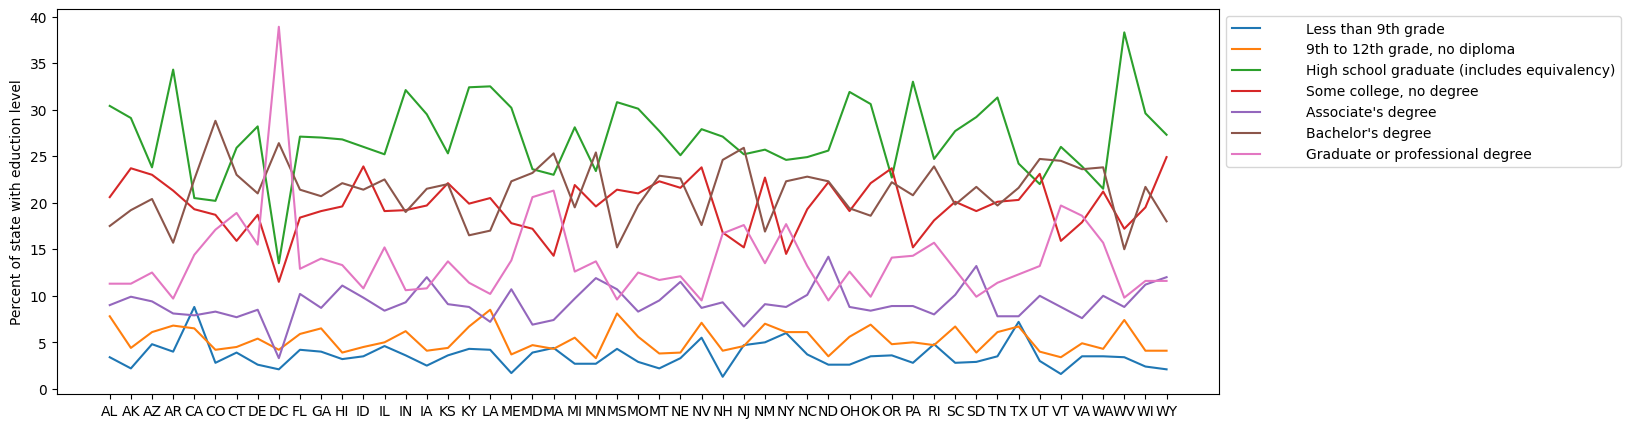

In [49]:
# Education across states
plt.figure(figsize=(15,5))
plt.plot(states, df_all_per.T[df_all_per.T.columns[[0,1,2,3,4,5,6]]], label=df_all_per.T.columns[[0,1,2,3,4,5,6]])

plt.ylabel("Percent of state with eduction level")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

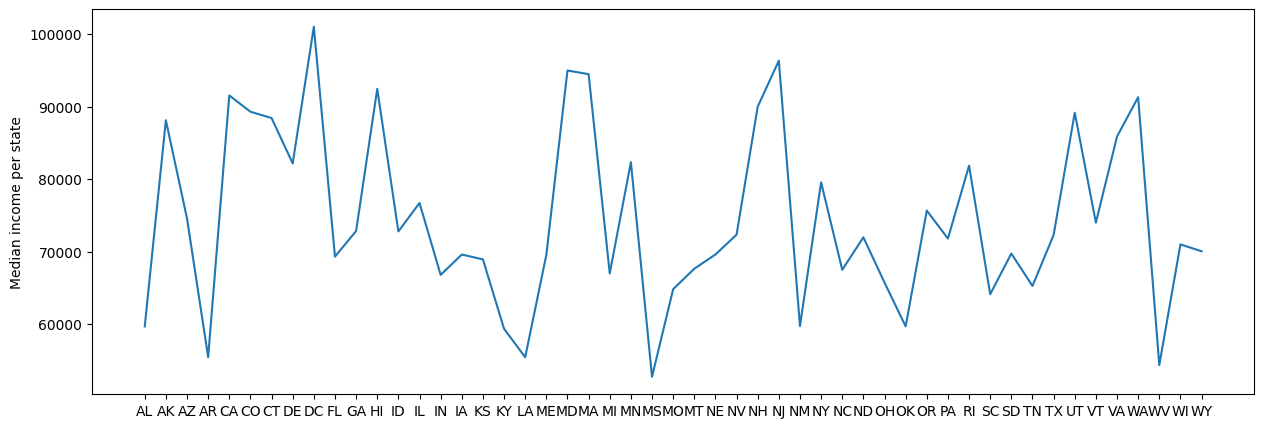

In [50]:
# Income across states
plt.figure(figsize=(15,5))
plt.plot(states, df_all_est.T[df_all_est.T.columns[7]])

plt.ylabel("Median income per state")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

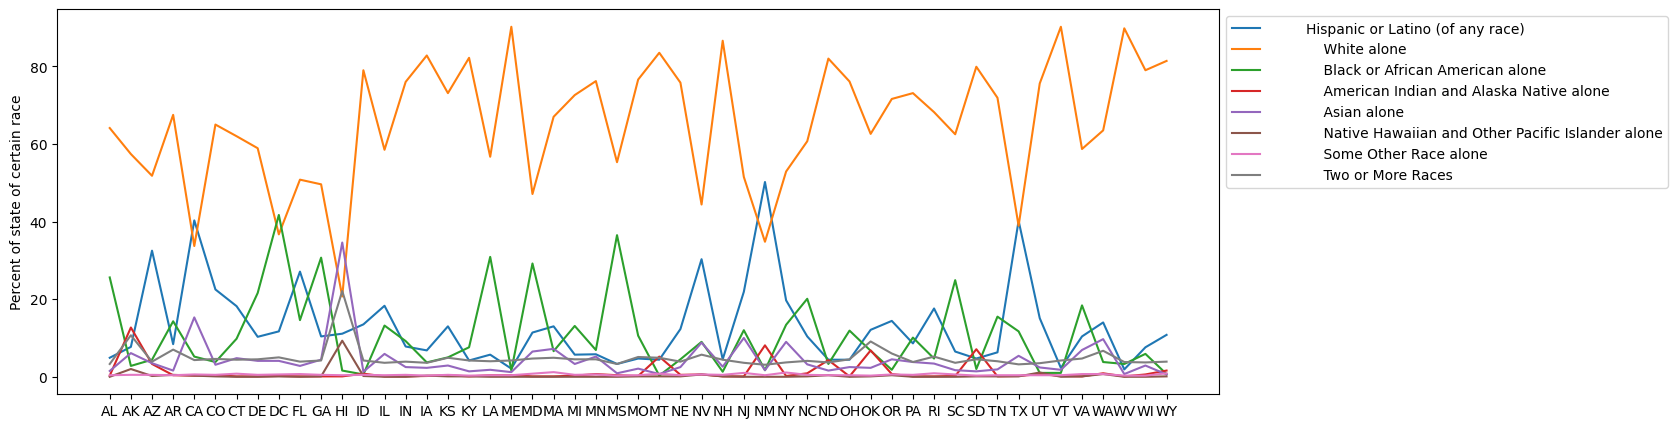

In [51]:
# Race across states
plt.figure(figsize=(15,5))
plt.plot(states, df_all_per.T[df_all_per.T.columns[[8,9,10,11,12,13,14,15]]], label=df_all_per.T.columns[[8,9,10,11,12,13,14,15]])

plt.ylabel("Percent of state of certain race")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show

These three graphs above show us what states are very different from eachother in terms of race or median income or education attainment. These differences help indicate which states we need to compare for vaccine and Covid-19 cases in our models.

# Table 2: Vaccine hesitancy statistics by county

We start by reading the csv into a data frame and deleting the columns that we don't need such as the state boundaries, county boundaries, and geographical point (longtitide and latitude).

In [52]:
url = "https://data.cdc.gov/api/views/q9mh-h2tw/rows.csv?accessType=DOWNLOAD"

hesitancy_df = pd.read_csv(url)
hesitancy_df.drop(labels=['County Boundary', 'State Boundary', 'Geographical Point'], axis=1, inplace=True)
hesitancy_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,State Code
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,AL
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,AL
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,AL
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,AL
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,0.362,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,AL


Now we can remove the catogorical varibales that we will not need and group by state.

In [53]:
hesitancy_df.drop(labels=['CVAC Level Of Concern', 'SVI Category', 'State', 'FIPS Code','County Name'], axis=1, inplace=True)
hesitancy_by_state = hesitancy_df.groupby('State Code').mean()
hesitancy_by_state.head()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
State Code,,,,,,,,,,,,
AK,0.217386,0.264245,0.156907,0.561724,0.744483,0.582296,0.053148,0.324583,0.053886,0.013293,0.005324,0.478703
AL,0.173507,0.231512,0.132409,0.703433,0.720149,0.320851,0.034864,0.005749,0.007072,0.287355,0.000269,0.648376
AR,0.212123,0.261232,0.139901,0.717733,0.644800,0.338800,0.052561,0.005515,0.006661,0.160659,0.001171,0.751871
AZ,0.159240,0.242547,0.121353,0.846000,0.901333,0.504733,0.313380,0.133180,0.013267,0.018427,0.001180,0.501993
CA,0.072274,0.111041,0.035807,0.633793,0.633276,0.506820,0.306224,0.017743,0.073066,0.029845,0.002805,0.537445


Then we can make a correlation table of all the quantitaive variables to get some ideas of what variables correlate with what. This will help give us a basic idea of what we should look at more and what we will be able to take away from this data table. We can also look at some basic summary statistics for the variables to give us a better picture of the data.

In [54]:
variables = ['Estimated hesitant', 
             'Estimated hesitant or unsure', 
             'Estimated strongly hesitant', 
             'Social Vulnerability Index (SVI)',
              'CVAC level of concern for vaccination rollout',
               'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)',
                'Percent Hispanic',
                'Percent non-Hispanic American Indian/Alaska Native',
                'Percent non-Hispanic Asian',
                'Percent non-Hispanic Black',
                'Percent non-Hispanic Native Hawaiian/Pacific Islander',
                'Percent non-Hispanic White'
                     ]
hesitancy_df[variables].corr()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
Estimated hesitant,1.000000,0.961811,0.975274,0.282310,0.338086,-0.199502,-0.210853,0.173319,-0.269042,0.159336,-0.047019,0.000838
Estimated hesitant or unsure,0.961811,1.000000,0.938115,0.386490,0.438484,-0.277029,-0.195632,0.154750,-0.303635,0.288680,-0.064783,-0.085858
Estimated strongly hesitant,0.975274,0.938115,1.000000,0.299722,0.350317,-0.205624,-0.205454,0.198035,-0.263052,0.171879,-0.048325,-0.023501
Social Vulnerability Index (SVI),0.282310,0.386490,0.299722,1.000000,0.717859,-0.276399,0.313903,0.167560,-0.058608,0.475836,0.000462,-0.615726
CVAC level of concern for vaccination rollout,0.338086,0.438484,0.350317,0.717859,1.000000,-0.401594,0.323777,0.139995,-0.139841,0.359244,0.002739,-0.512439
Percent adults fully vaccinated against COVID-19 (as of 6/10/21),-0.199502,-0.277029,-0.205624,-0.276399,-0.401594,1.000000,0.096973,0.148729,0.266810,-0.253635,0.067014,0.042492
Percent Hispanic,-0.210853,-0.195632,-0.205454,0.313903,0.323777,0.096973,1.000000,-0.042063,0.138102,-0.115655,0.017473,-0.601836
Percent non-Hispanic American Indian/Alaska Native,0.173319,0.154750,0.198035,0.167560,0.139995,0.148729,-0.042063,1.000000,-0.018333,-0.102222,0.017776,-0.293375
Percent non-Hispanic Asian,-0.269042,-0.303635,-0.263052,-0.058608,-0.139841,0.266810,0.138102,-0.018333,1.000000,0.016760,0.375992,-0.279602
Percent non-Hispanic Black,0.159336,0.288680,0.171879,0.475836,0.359244,-0.253635,-0.115655,-0.102222,0.016760,1.000000,-0.036959,-0.591361


In [55]:
hesitancy_df[variables].describe()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),CVAC level of concern for vaccination rollout,Percent adults fully vaccinated against COVID-19 (as of 6/10/21),Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White
count,3142.000000,3142.000000,3142.000000,3141.000000,3142.000000,2864.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.132600,0.191429,0.086653,0.500000,0.499965,0.399398,0.094184,0.018463,0.013621,0.089259,0.000919,0.762499
std,0.046337,0.053494,0.032938,0.288842,0.288832,0.142893,0.138647,0.076340,0.027665,0.144283,0.006240,0.202157
min,0.026900,0.049900,0.018600,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006900
25%,0.098300,0.148500,0.062325,0.250000,0.250000,0.318000,0.022200,0.001200,0.002800,0.006500,0.000000,0.644450
50%,0.131800,0.190100,0.084900,0.500000,0.500000,0.400000,0.042300,0.002800,0.006100,0.021900,0.000100,0.837400
75%,0.161725,0.228800,0.104475,0.750000,0.750000,0.494000,0.096800,0.006900,0.012800,0.098400,0.000600,0.924875
max,0.267000,0.323300,0.182400,1.000000,1.000000,0.999000,0.991700,0.919000,0.417300,0.872300,0.272700,1.000000


We can see that the 3 columns that talk about hesitancy are very strongly correlated, and when we look at summary statistics, we can see that on average the "Estimated hesitant or unsure" is slightly higher than the "Estimated hesitant" and the "Estimated strongly hesitant" is slightly below. Knowing this, we will look only at the "Estimated hesitant" column in order to simplify things.

In [56]:
hesitancy_df.drop(labels=['Estimated hesitant or unsure', 'Estimated strongly hesitant'], axis=1, inplace=True)
hesitancy_by_state.drop(labels=['Estimated hesitant or unsure', 'Estimated strongly hesitant'], axis=1, inplace=True)

The social vulernability index is define as "a database that helps emergency response planners and public health officials identify, map, and plan support for communities that will most likely need support before, during, and after a public health emergency." It acts as an estimate of how much support a county will need in the event of a punlic health emergency based off a large number of factors. Below we can make a scatter of the percent of a county that is white compared to the SVI.

<Axes: xlabel='[Percent non-Hispanic White]', ylabel='Social Vulnerability Index (SVI)'>

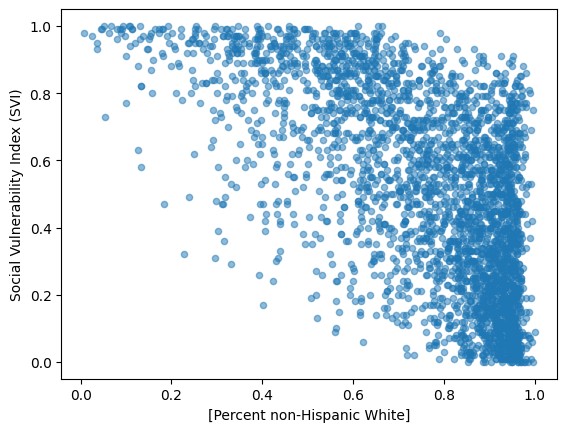

In [57]:
hesitancy_df.plot.scatter(x=['Percent non-Hispanic White'], 
                          y='Social Vulnerability Index (SVI)', alpha = 0.5)

# Table 3: CDC Vaccine Trends

Next we will open up a data set from the CDC on vaccine trends in the united states that can be found here https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Trends-in-the-United-States-N/rh2h-3yt2

In [58]:
vaccines = pd.read_csv('/Users/colletteriviere/criviere1.github.io/datasets/COVID-19_Vaccination_Trends_in_the_United_States_National_and_Jurisdictional.csv')
vaccines.head()

,Date,date_type,MMWR_week,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Admin_Dose_1_Daily,Admin_Dose_1_Cumulative,Admin_Dose_1_Day_Rolling_Average,...,Booster_7_Day_Rolling_Average,Additional_Doses_Vax_Pct,Second_Booster_50Plus_Daily,Second_Booster_50Plus_Cumulative,Second_Booster_50Plus_7_Day_Rolling_Average,Second_Booster_50Plus_Vax_Pct,Bivalent_Booster_Daily,Bivalent_Booster_Cumulative,Bivalent_Booster_7_Day_Rolling_Average,Bivalent_Booster_Pop_Pct
0,05/10/2023,Report,19,CO,15097,13033446,NaN,1527,4837792,NaN,...,NaN,57.9,1062,794838,NaN,62.9,9725,1272115,NaN,22.1
1,05/10/2023,Report,19,AZ,16505,14647405,NaN,2955,5704677,NaN,...,NaN,50.2,1312,794699,NaN,54.3,11388,1148060,NaN,15.8
2,05/10/2023,Report,19,MN,16020,12829141,NaN,1282,4461994,NaN,...,NaN,63.6,1196,983284,NaN,67.8,5497,1510743,NaN,26.8
3,05/10/2023,Report,19,ID,3526,2894361,NaN,323,1146055,NaN,...,NaN,48.8,281,173862,NaN,54.8,2032,248989,NaN,13.9
4,05/10/2023,Report,19,DC,31,2137377,NaN,264,836680,NaN,...,NaN,51.4,106,80880,NaN,55.9,509,226857,NaN,32.1


Next we can drop all of the rows that contain data from a US territory, as we will only be looking at the 50 states + DC. We also will convert the date column to datetime type, and drop any columns that we don't need.

In [59]:
territories = ['VI','FM', 'MH','MP','AS','GU','PR','PW','US']
mask = vaccines["Location"].isin(territories)
vaccines = vaccines[~mask]
vaccines.Date = pd.to_datetime(vaccines['Date'])

In [60]:
vaccines.drop(labels=['MMWR_week', 
                      'Bivalent_Booster_7_Day_Rolling_Average',
                      'Bivalent_Booster_Cumulative',
                      'Bivalent_Booster_Daily',
                      'Second_Booster_50Plus_Vax_Pct',
                      'Second_Booster_50Plus_7_Day_Rolling_Average',
                      'Second_Booster_50Plus_Cumulative',
                      'Second_Booster_50Plus_Daily',
                      'Booster_Daily',
                      'Booster_Cumulative',
                      'Booster_7_Day_Rolling_Average',
                      'Series_Complete_Day_Rolling_Average',
                      'Series_Complete_Cumulative',
                      'Series_Complete_Daily',
                      'Administered_daily_change_report_7dayroll',
                      'Administered_daily_change_report',
                      'Admin_Dose_1_Day_Rolling_Average',
                      'Admin_Dose_1_Cumulative',
                      'Admin_Dose_1_Daily',
                      'date_type'
                      ], axis=1, inplace=True)

In [61]:
vaccines.head()

,Date,Location,Administered_Daily,Administered_Cumulative,Administered_7_Day_Rolling_Average,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct,Additional_Doses_Vax_Pct,Bivalent_Booster_Pop_Pct
0,2023-05-10,CO,15097,13033446,NaN,84.0,73.8,57.9,22.1
1,2023-05-10,AZ,16505,14647405,NaN,78.4,66.2,50.2,15.8
2,2023-05-10,MN,16020,12829141,NaN,79.1,72.4,63.6,26.8
3,2023-05-10,ID,3526,2894361,NaN,64.1,56.6,48.8,13.9
4,2023-05-10,DC,31,2137377,NaN,95.0,91.3,51.4,32.1


Now that we have the data that we want, we can make a plot to see vaccine trends overtime, as well as by state

<Axes: title={'center': 'Daily vaccines over time'}, xlabel='Date'>

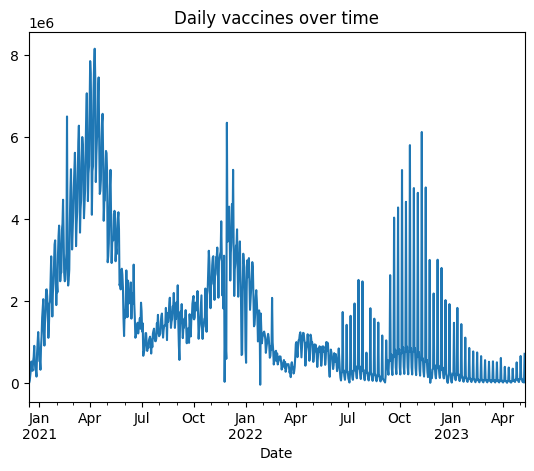

In [62]:
vaccines.groupby("Date")['Administered_Daily'].sum().plot(title="Daily vaccines over time")

<Axes: title={'center': 'Percent of people with at least 1 dose by state'}, xlabel='Location'>

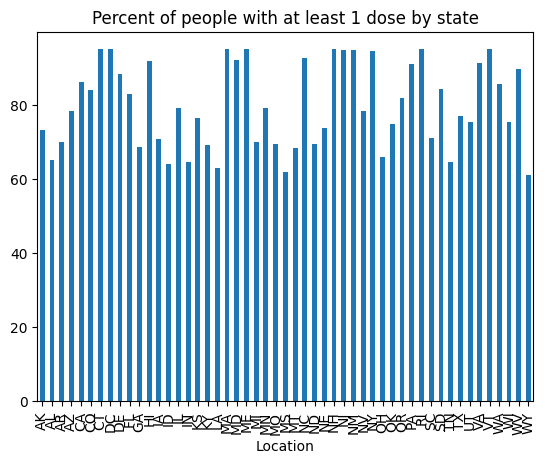

In [63]:
vaccines.groupby("Location")['Administered_Dose1_Pop_Pct'].max().plot.bar(title="Percent of people with at least 1 dose by state")

# Table 4: Confirmed Covid-19 cases by state, 2020:2023

This data is from the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. Over the course of three years, (1/22/20 to 3/9/23) data on the daily confirmed cases, deaths, and recoveries from Covid-19 were published to this Github repository: https://github.com/CSSEGISandData/COVID-19.git. The data is reported by city and state, but for ease, we chose to look at the state level so rows were aggregated to one row per state (or territory). Additionally, this dataset is being used to look at Covid-19 cases over time (dates), all other columns were dropped. Then, each state can be normalized by its population so we can compare across states.

In [64]:
confirmed_df = pd.read_csv("/Users/colletteriviere/criviere1.github.io/datasets/time_series_covid19_confirmed_US.csv")
confirmed_df.drop(columns=['iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','UID','Admin2','Combined_Key'], inplace=True)
confirmed_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Alabama,0,0,0,0,0,0,0,0,0,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,Alabama,0,0,0,0,0,0,0,0,0,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,Alabama,0,0,0,0,0,0,0,0,0,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,Alabama,0,0,0,0,0,0,0,0,0,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,Alabama,0,0,0,0,0,0,0,0,0,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [65]:
confirmed_state_by_day = confirmed_df.groupby('Province_State').sum() 
confirmed_state_by_day.drop(labels=['American Samoa','Diamond Princess','Grand Princess', 'Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands'], axis='index', inplace=True)
confirmed_state_by_day.rename(us_state_to_abbrev, inplace=True)
confirmed_state_by_day = confirmed_state_by_day.div(population,axis=0)
confirmed_state_by_day 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
AL,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.322872,0.323604,0.323604,0.323604,0.323604,0.323604,0.323604,0.323604,0.324091,0.324091
AK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.418593,0.418593,0.418593,0.418593,0.418593,0.418593,0.418593,0.419387,0.419387,0.419387
AZ,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.358844e-07,1.358844e-07,1.358844e-07,1.358844e-07,1.358844e-07,1.358844e-07,...,0.330828,0.331598,0.331598,0.331598,0.331598,0.331598,0.331598,0.331598,0.332035,0.332035
AR,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.329899,0.329899,0.330050,0.330133,0.330240,0.330258,0.330286,0.330419,0.330513,0.330598
CA,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.124350e-08,5.124350e-08,5.124350e-08,5.124350e-08,5.124350e-08,7.686525e-08,...,0.309962,0.309962,0.310224,0.310284,0.310284,0.310284,0.310284,0.310560,0.310560,0.310784
CO,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.301458,0.301602,0.301602,0.301891,0.301891,0.301891,0.301986,0.301986,0.302127,0.302127
CT,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.268943,0.268988,0.269024,0.269077,0.269155,0.269172,0.269195,0.269237,0.269288,0.269333
DE,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.324365,0.324818,0.324818,0.324818,0.324818,0.324818,0.324818,0.324818,0.324818,0.324818
DC,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.264220,0.264220,0.264533,0.264533,0.264533,0.264533,0.264533,0.264533,0.264533,0.264877


Now, we can look at the cases of covid over 3 years, state by state. This is give us an idea of trends of reported covid cases over time and how they vary state to state. Below is a plot of daily reported covid-19 cases, from 1/22/20 to 3/9/23. 

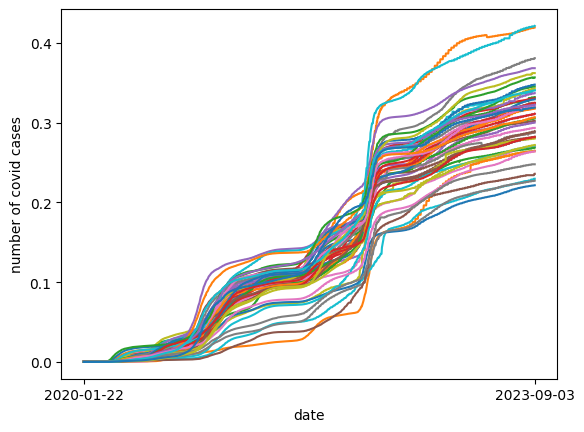

In [66]:
for i in confirmed_state_by_day.index:
    plt.plot(confirmed_state_by_day.loc[i])

plt.xticks(ticks=[0,1142], labels=['2020-01-22','2023-09-03'])
plt.xlabel('date')
plt.ylabel('number of covid cases')
plt.show()


Let's find the top 10 states.

In [67]:
confirmed_state_by_day.sort_values(['3/9/23'], ascending=False)[0:10]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Province_State,,,,,,,,,,,,,,,,,,,,,
RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.419897,0.419897,0.420619,0.420619,0.420619,0.420619,0.420619,0.420619,0.420619,0.421215
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.418593,0.418593,0.418593,0.418593,0.418593,0.418593,0.418593,0.419387,0.419387,0.419387
KY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.379677,0.379677,0.379780,0.379780,0.379780,0.379780,0.379780,0.379780,0.380841,0.380841
ND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.367996,0.368127,0.368233,0.368233,0.368233,0.368233,0.368233,0.368233,0.368233,0.368233
WV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.360107,0.361125,0.361125,0.362086,0.362086,0.362086,0.362086,0.362086,0.362086,0.362086
TN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.356310,0.356410,0.356555,0.356658,0.356688,0.355961,0.355961,0.355961,0.356688,0.356688
SC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.347124,0.347124,0.347124,0.347124,0.347124,0.347124,0.347124,0.347661,0.347661,0.347661
NY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.344683,0.344705,0.344825,0.344912,0.344962,0.345000,0.345121,0.345173,0.345242,0.345311
LA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.341181,0.342176,0.342176,0.342176,0.342176,0.342176,0.342176,0.342176,0.342860,0.342860


From the plot, we can see that some states, like California, Texax, and Flordia, have many more cases than others, some saw outbreaks when others didnt, and some didn't have many cases at all. This can help us answer questions about how Covid-19 impacted different states and what states were impacted the most at different times.

To look at this data a bit closer, we can look at the average number of cases over three months. Then we can look at the summary statistics for that data.

In [68]:
confirmed_state_by_day.columns = pd.to_datetime(confirmed_state_by_day.columns, dayfirst=True, format='mixed')
confirmed_day = confirmed_state_by_day

In [69]:
# 3 month average
threemonthaverage = confirmed_day.T.resample('Q').mean().T
threemonthaverage.describe()

,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,2022-12-31,2023-03-31,2023-06-30,2023-09-30,2023-12-31
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.005235,0.007538,0.014041,0.030540,0.090835,0.100065,0.109770,0.131105,0.240437,0.254610,0.270858,0.280696,0.304661,0.304581,0.304938,0.303748
std,0.001836,0.003357,0.005428,0.010994,0.023581,0.023763,0.025366,0.028384,0.037292,0.037791,0.039234,0.040229,0.042954,0.042938,0.042993,0.042764
min,0.000913,0.001775,0.002354,0.004824,0.024947,0.028226,0.037531,0.051188,0.161021,0.176215,0.189901,0.198008,0.218457,0.218241,0.218586,0.217686
25%,0.004269,0.005853,0.010371,0.025464,0.083549,0.095271,0.102957,0.123079,0.220404,0.233432,0.250029,0.257820,0.278108,0.278063,0.278225,0.277407
50%,0.005335,0.007206,0.014379,0.031670,0.095450,0.104992,0.113794,0.136742,0.244085,0.257232,0.275849,0.285490,0.307651,0.307485,0.307795,0.306877
75%,0.006587,0.009626,0.017877,0.036535,0.104459,0.112752,0.126011,0.149560,0.265644,0.277810,0.294943,0.304175,0.327246,0.327358,0.327614,0.326181
max,0.008778,0.017326,0.026213,0.062489,0.135999,0.143746,0.151098,0.182793,0.329611,0.354901,0.380810,0.389948,0.415746,0.415266,0.415930,0.414247


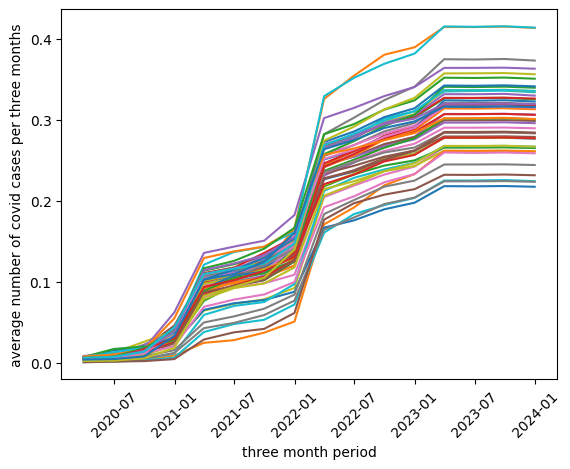

In [70]:
plt.plot(threemonthaverage.T)
plt.xticks(rotation=45)
plt.xlabel('three month period')
plt.ylabel('average number of covid cases per three months')
plt.show()

From these summary statistics, there was a massive increase in cases from 1/21 to 4/21 in 2020 (increased 3 fold) and also from 1/22 to 4/22 (increased 2 fold). After the Covid-19 vaccine was released in December of 2020, the immediate three following months saw a massive increase in cases, then the next 9 months saw a plateu in cases. That intial big spike could be from the slow roll-out of the vaccine to the general public, but the plateu after seems to validate the effectiveness of the vaccine. The peak after about 9 months could be a result of winter and everyone being in closer quarters, and could also indicate the vaccine was effective for about 9 months, until another booster was encouraged to maintain increased levels of immune responses.

# Model Plan

Using these datasets, we can find the correlation between different demographic information and vaccine hesitancy, actual vaccine trends, and Covid-19 cases. We can determine the correlations for each pair of the four datasets and as combinations. The datasets should be normalized to population so the correlation is interpretable. Graphs, such as hesitancy by state vs vaccine rates by state can help visually show the correlations found. These correlations can also help address the question of the effectiveness of the vaccine on Covid-19 cases.

We also can also use demographic information, vaccine hesitancy, and Covid-19 to predict vaccine rates. This will include combining all the datasets, splitting the data into training and testing sets, and finally implementing a predictive model, such as k-nearest neighbors or linear regression (linear_model in sklearn package). This model can be evaluated using k-fold cross validation and performance metrics such as MSE, RMSE, and MAE.